In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets") .mkdir(parents =True, exist_ok=True)
        url ="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
housing = load_housing_data()
print(housing.head())

    



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Info of entire dataset

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Getting insights in categorical data 





In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Summary of all numeric data in dataset

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Using Histogram to summarize numeric data

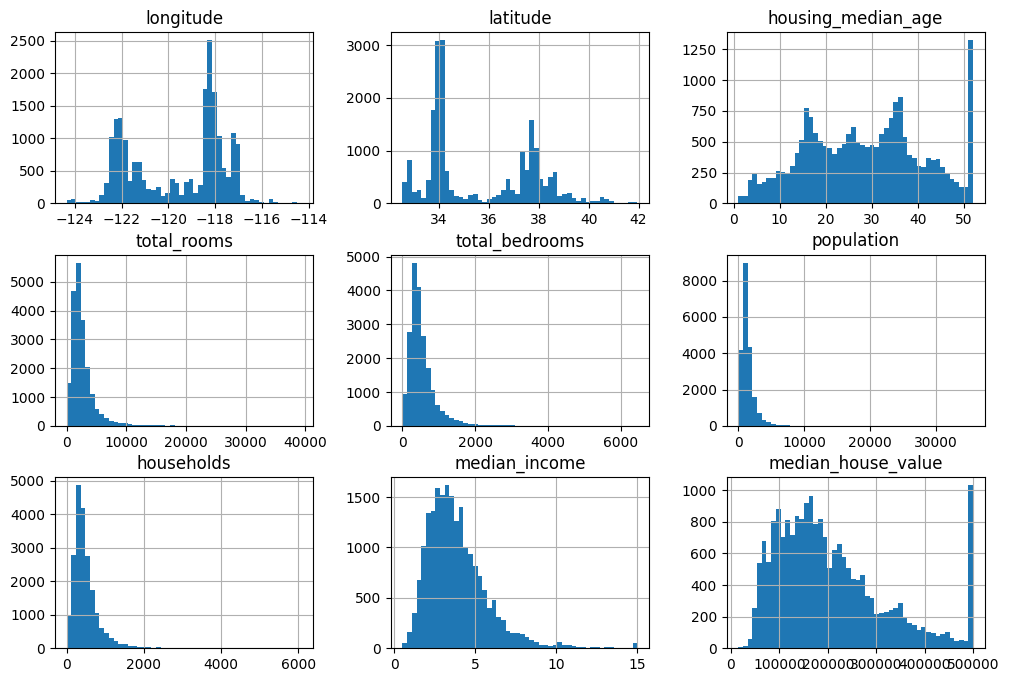

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))

plt.show()


## Create a Test set

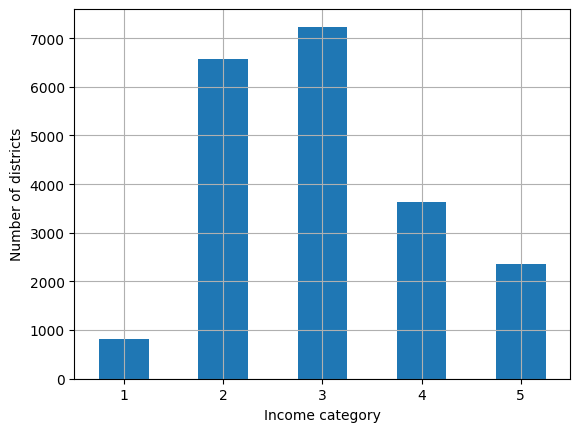

In [7]:
# create the test_set early to avoid data snooping bias
#use the scikit-learn train_test_split function
# & stratified sampling to ensure the test_set is representative of the overall population

from sklearn.model_selection import train_test_split
import numpy as np
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


#apply stratified sampling to the median_income attribute(use stratify way as the approach used split all data in dataset)
# why median_income? because it is a very important attribute to predict median housing prices(it is a continuous numerical attribute & as strong correlation with the target attribute)

housing["income_cat"] =pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,
                                                           grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()


## Perform stratified sampling

In [8]:
# train_test_split with stratify
strat_train_set, strat_test_set =train_test_split(housing, test_size=0.2, stratify=housing["income_cat"],
                                                  random_state=42)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

## Reverting to data to original state (from income_cat column)

In [9]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

## Visualizing Geographical Data
## 1st make copy from original data to work with
## Only training_set is used 


In [10]:
# making a copy of the training set to avoid harming the original dataset

housing =strat_train_set.copy()

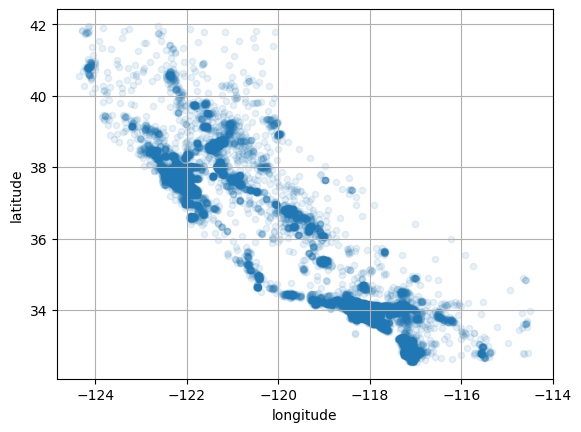

In [11]:
# Visualizing Geographical Data

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, grid=True)
plt.show()

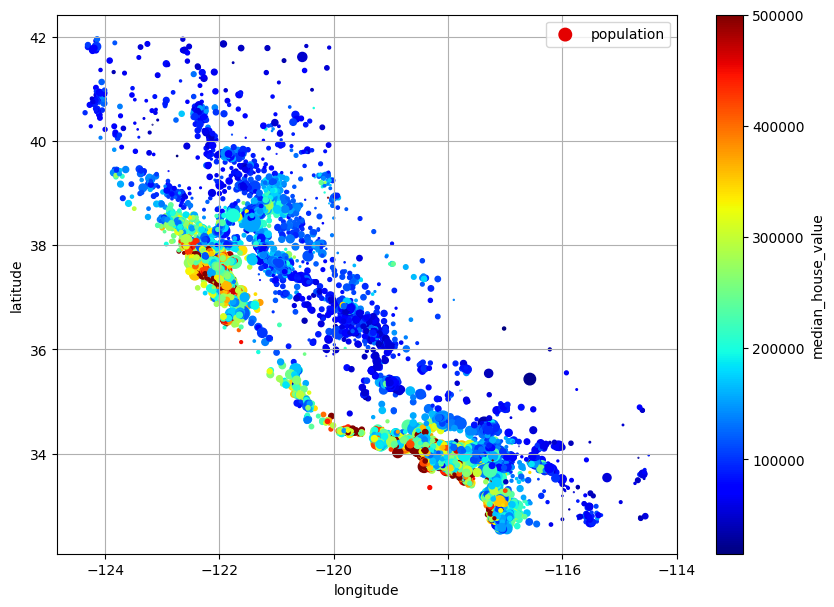

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
              c="median_house_value", cmap="jet", colorbar=True,
              legend=True, sharex=False, figsize=(10,7))
plt.show()



## Perform Correction in all attribute as data is not huge

In [13]:


import numpy as np

cor_matrix = housing.select_dtypes(include=[np.number]).corr()
print(cor_matrix["median_house_value"].sort_values(ascending=False))


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


## Attribute Combination
* Attribute are combined to get better pattern 

In [14]:
# ...existing code...
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] /housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

# Select only numeric columns for correlation calculation
numeric_housing = housing.select_dtypes(include=[np.number])

corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Preparing data for machine learning Algorithm
* Data Clealing

In [15]:
"""revert to a clean training set (by copying strat_train_set
once again). Let’s also separate the predictors and the labels, since we don’t
necessarily want to apply the same transformations to the predictors and the
target values (note that drop() creates a copy of the data and does not affect
strat_train_set)"""

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [16]:
# Use SimpleImputer to fill in missing values in the dataset

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

# create a copy of the data without the text attribute ocean_proximity
housing_num = housing.select_dtypes(include=[np.number])

# fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [17]:
# the imputer has computed the median of each attribute and stored the result in its statistics_ instance variable
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [18]:
# transform the training set by replacing missing values with the learned medians
X = imputer.transform(housing_num)

## Handling Text & Categorical Attributes

In [19]:
# accessing the column with text attribute ocean_proximity

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [20]:
# convert these categories from text to numbers as most ML algorithms prefer to work with numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [21]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Convert categorical values into one-hot vectors:


In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot =cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [23]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [24]:

cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()


array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

## Performing features Scaling using Stardazation method

In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_scaled = std_scaler.fit_transform(housing_num)

In [27]:
# perform rbf(a Radial Basis Function)
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]],
gamma=0.1)

## Transform even the target values
* Train the model on a single raw input feature(median income) for simplicity

In [28]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5] #pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)


## Custorm Transformers

In [29]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [30]:
rbf_transformer = FunctionTransformer(rbf_kernel,
 kw_args=dict(Y=[[35.]],
gamma=0.1))
age_simil_35 =rbf_transformer.transform(housing[["housing_median_age"]])

In [31]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords],
                                                  gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude",
                                             "longitude"]])

In [32]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
 def __init__(self, with_mean=True):
   # no *args or **kwargs!
  self.with_mean = with_mean
 def fit(self, X, y=None): # y is required even though we don't use it
  X = check_array(X) # checks that X is an array with finite float values
  self.mean_ = X.mean(axis=0)
  self.scale_ = X.std(axis=0)
  self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
  return self # always return self!
 def transform(self, X):
  check_is_fitted(self) # looks for learned attributes (withtrailing _)
  X = check_array(X)
  assert self.n_features_in_ == X.shape[1]
  if self.with_mean:
   X = X - self.mean_
  return X / self.scale_

In [34]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
 def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
  self.n_clusters = n_clusters
  self.gamma = gamma
  self.random_state = random_state
 def fit(self, X, y=None, sample_weight=None):
  self.kmeans_ = KMeans(self.n_clusters,
  random_state=self.random_state)
  self.kmeans_.fit(X, sample_weight=sample_weight)
  return self # always return self!
 def transform(self, X):
  return rbf_kernel(X, self.kmeans_.cluster_centers_,
  gamma=self.gamma)
 def get_feature_names_out(self, names=None):
  return [f"Cluster {i} similarity" for i in
range(self.n_clusters)]

In [35]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,
random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude",
"longitude"]],
 
sample_weight=housing_labels)

In [36]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

In [37]:
# Transform the data using the pipeline
from sklearn.pipeline import make_pipeline
num_pipeline =make_pipeline(SimpleImputer(strategy="median"),
                            StandardScaler())

In [38]:
# call the pipeline's fit() method

housing_num_prepared =num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [39]:
# Recover a nice DataFrame using the pipeline get_feature_names_out() method

df_housing_num_prepared =pd.DataFrame(housing_num_prepared,
                                      columns =num_pipeline.get_feature_names_out(),
                                      index=housing_num.index)

## Have One transformer capble of handling all columns applying appropriate transformations to each column(ColumnTransformer)


In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
    
])

In [41]:
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=object)))

In [79]:
from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import FunctionTransformer, StandardScaler, SimpleImputer
from sklearn.impute import SimpleImputer  # Correct import
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.utils._testing import ignore_warnings
from sklearn.cluster import KMeans
import numpy as np

# Define a proper function for feature names
def get_feature_names(input_features, name):
    return [name] if input_features is not None else []

# Define the ratio function
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Fix the ratio pipeline
def ratio_pipeline(name=None):
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=lambda input_features: get_feature_names(input_features, name)),
        StandardScaler()
    )

# Define log pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler()
)

# Cluster similarity transformer (placeholder)
class ClusterSimilarity:
    def __init__(self, n_clusters=10, gamma=1., random_state=42):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self
    
    def transform(self, X):
        return self.kmeans.transform(X)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Default numerical pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Define the full preprocessing pipeline
preprocessing = ColumnTransformer([
    ("bedrooms_ratio", ratio_pipeline("bedrooms_ratio"), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline("rooms_per_house"), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline("people_per_house"), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", None, make_column_selector(dtype_include=object)),  # Replace None with your categorical pipeline
], remainder=default_num_pipeline)


In [43]:
housing_prepared =preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [44]:
#preprocessing.get_feature_names_out()

## Select and Train a model
* Training and Evaluating on the Training Set

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pipel...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F51CF84C50>)])),
                ('linearregression', LinearRegression())])

In [46]:
# make predictions on the training set

housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [47]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

## It's working but the 1st prediction is way off(by over $ 200,000)
*The predictions are better: 2 are off by about 25% & 2 by 10%

## Measure the model performance measure (RMSE)
* On the whole Training model

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(housing_labels, housing_predictions)  # Default squared=True
rmse = np.sqrt(mse)  # Manually take the square root
#pd.Series(housing_predictions).describe()
print(rmse)


0.0


## Try a more complex model as the linearRegression model is underfitting

In [49]:

# use DecisionTreeRegressor to train the model

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pipel...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F51CF84C50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [50]:
housing_predictions= tree_reg.predict(housing)
tree_rmse= mean_squared_error(housing_labels,
             housing_predictions)

tree_rmse

0.0

## use k-fold cross-validation 

In [51]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error",
                             cv=10)


In [52]:
pd.Series(-tree_rmses).describe()

count       10.000000
mean     66573.734600
std       1103.402323
min      64607.896046
25%      66204.731788
50%      66388.272499
75%      66826.257468
max      68532.210664
dtype: float64

## Try RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = cross_val_score(forest_reg, housing, housing_labels,
                               scoring="neg_root_mean_squared_error", cv=10)

In [59]:
pd.Series(forest_rmses).describe()

count       10.000000
mean    -47038.092799
std       1021.491757
min     -49140.832210
25%     -47480.519175
50%     -47118.719249
75%     -46510.418013
max     -45495.976649
dtype: float64

## Fine-Tune the model

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Ensure preprocessing is correctly defined
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),  # Ensure preprocessing is properly built
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],  # Ensure 'geo' exists in preprocessing
     'random_forest__max_features': [4, 6, 8]},    # Correct parameter name
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F51CF84C50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [65]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [66]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False,inplace=True)


In [67]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,10.173285,0.109790,0.241917,0.006824,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,14.070733,0.325819,0.279681,0.042416,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,13.273269,0.292735,0.403852,0.002168,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,9.565112,0.083790,0.216335,0.001228,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,19.023063,1.601911,0.346545,0.101818,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


## Randomized Search

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3,
high=50),
 'random_forest__max_features': randint(low=2,
high=20)}
rnd_search = RandomizedSearchCV(
 full_pipeline, param_distributions=param_distribs, n_iter=10,
cv=3,
 scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F51AA77E60>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F5110D0DD0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

## Ensemble Methods
* Analyse the Best model and their Errors

In [69]:
final_model =rnd_search.best_estimator_ # includes preprocessing
feature_importances= final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

## sort the importance score in descending order

In [82]:
#sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

## Evaluate Your System on the Test Set

In [75]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse)

1717732227.9191785


In [76]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([39293.55594722, 43491.1590655 ])

## Launch, Monitor, and Maintain Your system
* Polish your code
* write documentation & tests

In [80]:
# loading the model to a file

import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

PicklingError: Can't pickle <function column_ratio at 0x000001F51A575800>: it's not the same object as __main__.column_ratio

In [92]:
import streamlit as st
import dill  # Import dill to load the model
import numpy as np

# Load the model using dill
with open("my_california_housing_model.pkl", "rb") as f:
    loaded_model = dill.load(f)

# Streamlit App UI
st.title("California Housing Price Predictor")

# User Input Fields
st.write("Enter values for prediction:")
median_income = st.number_input("Median Income ($10,000s):", min_value=0.0, step=0.1)
total_rooms = st.number_input("Total Rooms:", min_value=0, step=1)
total_bedrooms = st.number_input("Total Bedrooms:", min_value=0, step=1)
population = st.number_input("Population:", min_value=0, step=1)
households = st.number_input("Households:", min_value=0, step=1)
latitude = st.number_input("Latitude:", min_value=-90.0, max_value=90.0, step=0.01)
longitude = st.number_input("Longitude:", min_value=-180.0, max_value=180.0, step=0.01)

# Prediction Button
if st.button("Predict"):
    # Prepare the input data as a NumPy array (adjust as per your model's input)
    input_data = np.array([[median_income, total_rooms, total_bedrooms, 
                            population, households, latitude, longitude]])

    # Make Prediction
    prediction = loaded_model.predict(input_data)

    # Display Result
    st.write(f"Predicted House Price: **${prediction[0]:,.2f}**")


2025-02-25 18:39:38.947 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 18:39:43.604 
  command:

    streamlit run c:\Users\ronny somi\Desktop\Booking\Card\Carifonia_House_price_model\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-25 18:39:43.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 18:39:43.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 18:39:43.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 18:39:43.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 18:39:43.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mod

In [91]:
import dill

# Assuming `final_model` is your trained model
with open("my_california_housing_model.pkl", "wb") as f:
    dill.dump(final_model, f)
